In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
salary = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data Science Assignments/Assignment 4 - Simple Linear Regression/Salary_Data.csv")

In [3]:
salary.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [6]:
# Plotting the data to check for outliers

<AxesSubplot:>

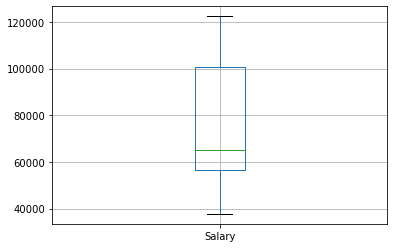

In [7]:
salary.boxplot('Salary')

<AxesSubplot:>

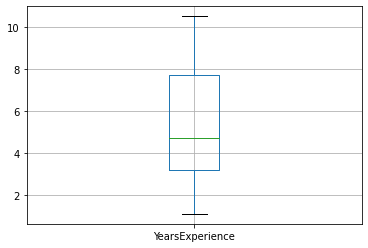

In [8]:
salary.boxplot('YearsExperience')

<AxesSubplot:>

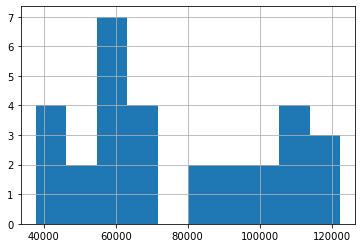

In [9]:
salary.Salary.hist()

<AxesSubplot:>

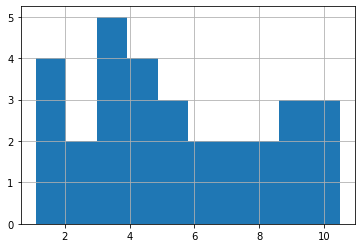

In [10]:
salary.YearsExperience.hist()

In [11]:
# Building a regression model

In [12]:
model = smf.ols("Salary~YearsExperience",data = salary).fit()

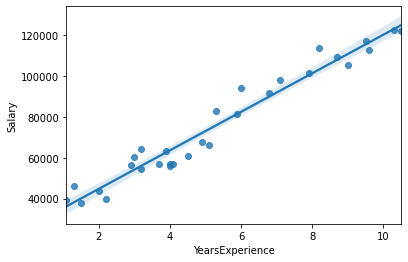

In [13]:
sns.regplot(x="YearsExperience", y="Salary", data=salary);

In [14]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [15]:
print(model.tvalues, '\n', model.pvalues)    

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [16]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [17]:
# As there are no outliers as per box plots and R value is also .95, we can consider this a good model and use this for future prediction of new data points.

In [18]:
# Checking the model by predicting the salary col based on existing years of experience

In [19]:
pred_salary = pd.DataFrame (model.predict(salary), columns=['Predict_Salary'])

In [20]:
pred_salary

,Predict_Salary
0,36187.158752
1,38077.151217
2,39967.143681
3,44692.124842
4,46582.117306
5,53197.090931
6,54142.087163
7,56032.079627
8,56032.079627
9,60757.060788


In [21]:
pred_salary1 = pd.concat([salary, pred_salary], axis=1)

In [22]:
pred_salary1

,YearsExperience,Salary,Predict_Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [23]:
Error = pd.DataFrame (((pred_salary1['Predict_Salary']- pred_salary1['Salary'])/pred_salary1['Salary']), columns=['Error'])

In [24]:
result = pd.concat ([pred_salary1, Error], axis=1)

In [25]:
result

,YearsExperience,Salary,Predict_Salary,Error
0,1.1,39343.0,36187.158752,-0.080214
1,1.3,46205.0,38077.151217,-0.175908
2,1.5,37731.0,39967.143681,0.059265
3,2.0,43525.0,44692.124842,0.026815
4,2.2,39891.0,46582.117306,0.167735
5,2.9,56642.0,53197.090931,-0.060819
6,3.0,60150.0,54142.087163,-0.099882
7,3.2,54445.0,56032.079627,0.029150
8,3.2,64445.0,56032.079627,-0.130544
9,3.7,57189.0,60757.060788,0.062391


In [26]:
result.style.format({'YearsExperience': "{:.1f}",'Salary': "{:.2f}",'Predict_Salary': "{:.2f}",'Error': "{:.2%}"})

,YearsExperience,Salary,Predict_Salary,Error
0,1.1,39343.00,36187.16,-8.02%
1,1.3,46205.00,38077.15,-17.59%
2,1.5,37731.00,39967.14,5.93%
3,2.0,43525.00,44692.12,2.68%
4,2.2,39891.00,46582.12,16.77%
5,2.9,56642.00,53197.09,-6.08%
6,3.0,60150.00,54142.09,-9.99%
7,3.2,54445.00,56032.08,2.92%
8,3.2,64445.00,56032.08,-13.05%
9,3.7,57189.00,60757.06,6.24%


In [27]:
result.Error.mean()

0.006200202438065895

In [28]:
# Since the mean of all the error values is close to 0, hence we can say regression equation for forecating is working well.